In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Read files from the website


In [2]:
def add(climate_data, url, name):
    data_city= pd.read_table(url, delim_whitespace=True, names=('Month', 'Day', 'Year', name))
    d1=data_city[['Month', 'Day', 'Year']]                       
    data_city['Date']=pd.to_datetime(d1)
    data_city=data_city[['Date',name]]
    climate_data=climate_data.merge(data_city, on = 'Date')
    return climate_data

In [3]:
N='AK_Anchorage_Temp'
url_1='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/AKANCHOR.txt'
data_Anchorage = pd.read_table(url_1, delim_whitespace=True, names=('Month', 'Day', 'Year', N))
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp
0,1,1,1995,23.2
1,1,2,1995,27.6
2,1,3,1995,32.0
3,1,4,1995,29.3
4,1,5,1995,30.1


In [4]:
data_Anchorage.shape

(9265, 4)

In [5]:
date1=data_Anchorage[['Month', 'Day', 'Year']]

In [6]:
data_Anchorage['Date']=pd.to_datetime(date1)

In [7]:
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp,Date
0,1,1,1995,23.2,1995-01-01
1,1,2,1995,27.6,1995-01-02
2,1,3,1995,32.0,1995-01-03
3,1,4,1995,29.3,1995-01-04
4,1,5,1995,30.1,1995-01-05


In [8]:
data_Anchorage=data_Anchorage[['Date','AK_Anchorage_Temp' ]]
data_Anchorage.head()
climate_data=data_Anchorage

In [9]:
url_2='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/NDFARGO.txt'
climate_data=add(climate_data,url_2, 'ND_Fargo_Temp')

In [10]:
climate_data.head()

,Date,AK_Anchorage_Temp,ND_Fargo_Temp
0,1995-01-01,23.2,5.2
1,1995-01-02,27.6,10.1
2,1995-01-03,32.0,-3.8
3,1995-01-04,29.3,-6.3
4,1995-01-05,30.1,8.4


In [11]:
url_3=['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/FLWPALMB.txt', 'FL_West_Palm_Beach_Temp']
url_4= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/VTBURLIN.txt', 'Vermont_Burlington_Temp']
url_5= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/TXELPASO.txt', 'TX_El_Paso_Temp']
url_6 = ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WYCHEYEN.txt', 'Wyoming_Cheyenne_Temp']
url_7= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/CASANFRA.txt','San_Francisco_Temp']
url_8= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/OHCLEVEL.txt','Cleveland_Temp']
url_9= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WIMILWAU.txt','Milwaukee_Temp']
url_10= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/NYBUFFAL.txt','NY_Bufallo_Temp']
url_11=['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/HIHONOLU.txt', 'Honolulu_Temp']
city_list=[url_3, url_4, url_5, url_6, url_7, url_8, url_9, url_10,url_11]

In [12]:
for url in city_list:
    climate_data=add(climate_data, url[0], url[1])
climate_data.shape

(9265, 12)

In [13]:
climate_data.head()

,Date,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,NY_Bufallo_Temp,Honolulu_Temp
0,1995-01-01,23.2,5.2,69.7,31.0,39.9,8.8,46.7,39.9,23.8,36.2,71.3
1,1995-01-02,27.6,10.1,68.7,30.1,37.0,19.0,47.3,23.5,14.5,28.4,72.5
2,1995-01-03,32.0,-3.8,68.9,25.9,41.3,11.3,49.6,21.4,15.5,22.6,73.2
3,1995-01-04,29.3,-6.3,68.0,23.1,40.1,5.0,50.0,15.2,3.9,15.2,71.9
4,1995-01-05,30.1,8.4,64.5,12.0,40.9,18.9,50.8,10.5,6.1,10.9,70.4


In [14]:
climate_data.isnull().sum()

Date                       0
AK_Anchorage_Temp          0
ND_Fargo_Temp              0
FL_West_Palm_Beach_Temp    0
Vermont_Burlington_Temp    0
TX_El_Paso_Temp            0
Wyoming_Cheyenne_Temp      0
San_Francisco_Temp         0
Cleveland_Temp             0
Milwaukee_Temp             0
NY_Bufallo_Temp            0
Honolulu_Temp              0
dtype: int64

In [15]:
climate_data.Date.dtype

dtype('<M8[ns]')

In [16]:
# Find the outliers in the temperature data

In [17]:
climate_check=climate_data[(climate_data.iloc[:,1:12]<-50)]
climate_check.dropna()

,Date,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,NY_Bufallo_Temp,Honolulu_Temp


In [18]:
climate_data[climate_data['AK_Anchorage_Temp']<-50]

,Date,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,NY_Bufallo_Temp,Honolulu_Temp
1453,1998-12-24,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1454,1998-12-25,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1459,1998-12-30,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1460,1998-12-31,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1470,1999-01-10,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2725,2002-06-18,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2726,2002-06-19,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2727,2002-06-20,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2728,2002-06-21,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
4622,2007-08-28,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [19]:
climate_data[climate_data['ND_Fargo_Temp']<-50]

,Date,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,NY_Bufallo_Temp,Honolulu_Temp
460,1996-04-05,36.4,-99.0,72.5,35.0,42.9,29.3,56.8,31.8,-99.0,30.9,78.5
461,1996-04-06,36.5,-99.0,77.5,37.1,-99.0,49.8,56.2,32.7,-99.0,33.4,78.3
463,1996-04-08,32.3,-99.0,70.3,34.3,59.9,51.6,-99.0,30.4,29.2,31.0,79.7
468,1996-04-13,39.1,-99.0,73.7,36.7,70.0,34.6,53.5,53.2,38.0,41.7,79.0
476,1996-04-21,41.8,-99.0,76.2,62.4,75.3,36.0,54.0,54.5,-99.0,49.4,79.9
478,1996-04-23,46.0,-99.0,77.4,54.5,-99.0,46.7,-99.0,45.1,-99.0,45.3,80.1
527,1996-06-11,47.3,-99.0,78.3,76.0,87.2,71.5,58.3,67.0,55.2,70.3,82.0
1453,1998-12-24,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1454,1998-12-25,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1459,1998-12-30,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [20]:
climate_data=climate_data.replace(-99, pd.NaT)

In [21]:
climate_data.isnull().sum()

Date                        0
AK_Anchorage_Temp          13
ND_Fargo_Temp              25
FL_West_Palm_Beach_Temp    25
Vermont_Burlington_Temp    22
TX_El_Paso_Temp            19
Wyoming_Cheyenne_Temp      16
San_Francisco_Temp         36
Cleveland_Temp             14
Milwaukee_Temp             55
NY_Bufallo_Temp            15
Honolulu_Temp              18
dtype: int64

In [22]:
climate_data=climate_data.set_index(['Date'])
climate_data.head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,NY_Bufallo_Temp,Honolulu_Temp
Date,,,,,,,,,,,
1995-01-01,23.2,5.2,69.7,31.0,39.9,8.8,46.7,39.9,23.8,36.2,71.3
1995-01-02,27.6,10.1,68.7,30.1,37.0,19.0,47.3,23.5,14.5,28.4,72.5
1995-01-03,32.0,-3.8,68.9,25.9,41.3,11.3,49.6,21.4,15.5,22.6,73.2
1995-01-04,29.3,-6.3,68.0,23.1,40.1,5.0,50.0,15.2,3.9,15.2,71.9
1995-01-05,30.1,8.4,64.5,12.0,40.9,18.9,50.8,10.5,6.1,10.9,70.4


In [23]:
#Show the data on graph to make sure there is no outliers.

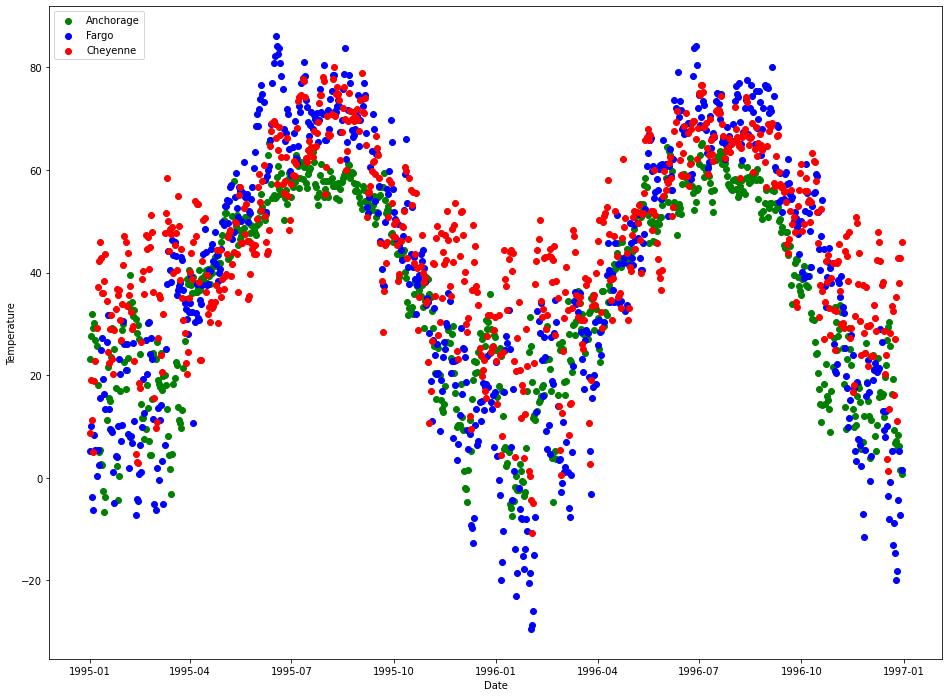

In [33]:
fig, ax = plt.subplots(figsize=(16,12))
plt.scatter(climate_data.index [0:730],climate_data['AK_Anchorage_Temp'][0:730], c='g',label='Anchorage' )
plt.scatter(climate_data.index [0:730],climate_data['ND_Fargo_Temp'][0:730],c='b',label='Fargo' )
plt.scatter(climate_data.index [0:730],climate_data['Wyoming_Cheyenne_Temp'][0:730],c='r',label='Cheyenne' )
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()

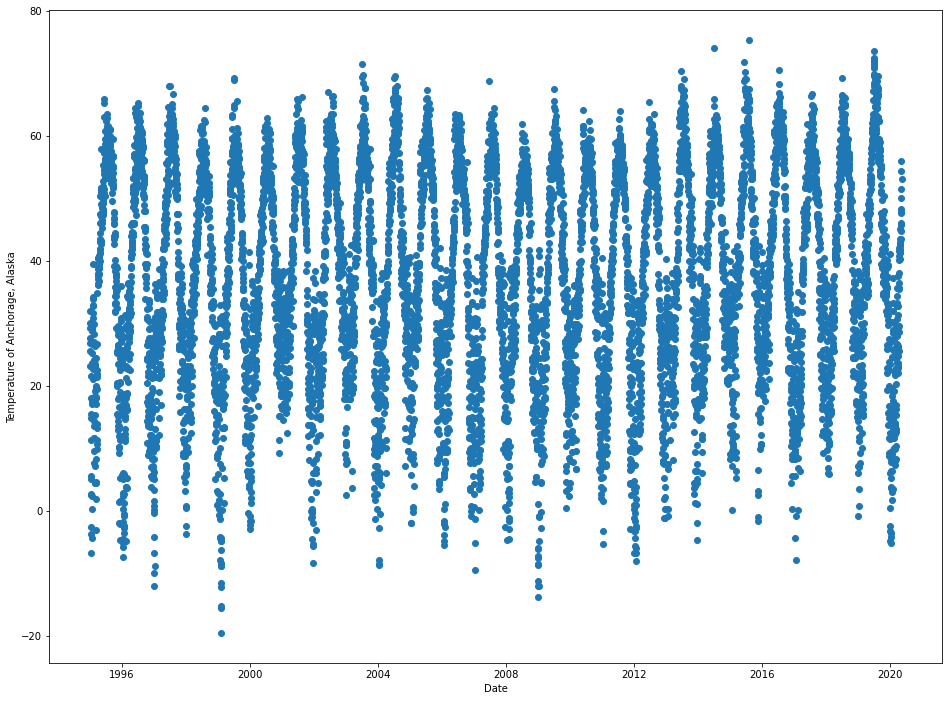

In [25]:
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(climate_data.index ,climate_data['AK_Anchorage_Temp'])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature of Anchorage, Alaska')
plt.show()

In [26]:
climate_data.AK_Anchorage_Temp.mean()

37.94265023778626

In [27]:
climate_data.Honolulu_Temp.mean()

77.37725748891555

In [28]:
climate_data.ND_Fargo_Temp.mean()

42.695887445887394

In [30]:
climate_data.Wyoming_Cheyenne_Temp.mean()

46.692280246513235

In [31]:
climate_data.FL_West_Palm_Beach_Temp.mean()

75.71752164502175